# Parte 4

## A)

In [2]:
import pandas as pd

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
np.random.seed(44)
from tensorflow import set_random_seed
set_random_seed(44)
from sklearn.metrics import confusion_matrix
import itertools


Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    x_tr, x_v, y_tr, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=1)
    print("{0} registros de entrenamiento.".format(x_tr.shape[0]))
    print("{0} registros de validación.".format(x_v.shape[0]))
    print("{0} registros de prueba.".format(x_t.shape[0]))
    print("Cada registro posee {0} pixeles.".format(x_t.shape[1]))
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

In [8]:
x_tr, x_v, x_t, y_tr, y_v, y_t = load_data()

21964 registros de entrenamiento.
5491 registros de validación.
7172 registros de prueba.
Cada registro posee 784 pixeles.


In [9]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5573,112,118,125,130,136,141,143,144,148,151,...,16,138,224,219,220,221,221,221,221,221
10761,80,93,109,123,137,146,157,165,167,169,...,108,104,104,92,82,77,80,92,122,126
1604,69,0,9,49,49,56,59,62,67,71,...,76,81,80,85,82,82,75,83,81,42
10156,195,197,198,198,199,199,199,199,199,199,...,130,198,219,172,162,194,212,222,222,191
3519,238,240,243,243,244,246,248,248,248,248,...,255,255,255,255,255,255,255,255,255,255


In [10]:
y_tr.value_counts()

17    1038
16    1010
11     990
22     982
19     972
3      967
18     957
5      955
8      946
14     946
23     925
20     914
13     909
0      903
24     894
2      894
6      885
10     880
21     872
15     864
1      834
12     830
7      818
4      779
Name: label, dtype: int64

## B)

In [11]:
def intensity_scale(X):
    X=X.apply(lambda x: x/255)
    return X

def scale_and_center(X):
    scalerX = StandardScaler()
    X = pd.DataFrame(scalerX.fit_transform(X))
    return X

In [12]:
x_tr1 = intensity_scale(x_tr)
x_v1 = intensity_scale(x_v)
x_t1 = intensity_scale(x_t)

x_tr2 = scale_and_center(x_tr1)
x_v2 = scale_and_center(x_v1)
x_t2 = scale_and_center(x_t1)

xtrain = x_tr2.as_matrix().reshape(x_tr.shape[0], 28, 28, 1)
xval = x_v2.as_matrix().reshape(x_v.shape[0], 28, 28, 1)
xtest = x_t2.as_matrix().reshape(x_t.shape[0], 28, 28, 1)

## C)

## Modelo 1: Modelo del Ayudante

In [65]:
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr2.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v2.values,to_categorical(y_v)))
print("Accuracy Validacion:",model.evaluate(x_v2.values,to_categorical(y_v))[1])
print("Accuracy Test:",model.evaluate(x_t2.values,to_categorical(y_t))[1])

C:\Users\Carlos\Anaconda3\envs\astroinf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Carlos\Anaconda3\envs\astroinf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carlos\Anaconda3\envs\astroinf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Carlos\Anaconda3\envs\astroinf\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 3s 119us/step - loss: 3.1990 - acc: 0.0871 - val_loss: 3.1424 - val_acc: 0.1260
Epoch 2/100
21964/21964 [==============================] - 1s 55us/step - loss: 2.9217 - acc: 0.1222 - val_loss: 2.6997 - val_acc: 0.1708
Epoch 3/100
21964/21964 [==============================] - 1s 52us/step - loss: 2.3446 - acc: 0.2534 - val_loss: 1.9070 - val_acc: 0.3701
Epoch 4/100
21964/21964 [==============================] - 1s 52us/step - loss: 1.6584 - acc: 0.4430 - val_loss: 1.3926 - val_acc: 0.5391
Epoch 5/100
21964/21964 [==============================] - 1s 52us/step - loss: 1.1803 - acc: 0.6003 - val_loss: 0.9711 - val_acc: 0.6676
Epoch 6/100
21964/21964 [==============================] - 1s 52us/step - loss: 0.8093 - acc: 0.7343 - val_loss: 0.6682 - val_acc: 0.7918
Epoch 7/100
21964/21964 [==============================] - 1s 53us/step - loss: 0.5566 - acc: 0.8274 - val_loss: 0.4974 - 

El modelo tiene un error de validación de prácticamente 0, sin embargo es una red neuronal que no esta hecha para captar las relaciones entre los pixeles de las imágenes. Está viendo los pixeles de forma lineal en lugar de verlos en 2 dimensiones.
Por esto tiene tan mal accuracy sobre el conjunto de test, realmente no logró captar los patrones de las imágenes.

Por esto se decidió usar redes neuronales convolucionales, que permiten trabajar sobre la imágen sin perder la relación en 2 dimensiones entre los pixeles.

Se creó el siguiente modelo, usando optimizador adam, 5 epocas y batch size 300.

## Modelo 2: Red con 4 capas convolucionales

In [26]:
model2 = Sequential()
model2.add(Conv2D(300, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(200, (3, 3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(100, (3, 3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(50, (3, 3), padding='same', activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))

model2.add(Dense(25, activation='softmax'))

batch_size = 300
epochs = 5
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(xtrain, to_categorical(y_tr), batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(xval, to_categorical(y_v)))
print("Accuracy Validacion:",model2.evaluate(xval,to_categorical(y_v))[1])
print("Accuracy Test:",model2.evaluate(xtest,to_categorical(y_t))[1])



Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 10s 445us/step - loss: 1.3474 - acc: 0.6313 - val_loss: 0.1450 - val_acc: 0.9816
Epoch 2/5
21964/21964 [==============================] - 9s 409us/step - loss: 0.0401 - acc: 0.9975 - val_loss: 0.0104 - val_acc: 0.9998
Epoch 3/5
21964/21964 [==============================] - 9s 408us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 4/5
21964/21964 [==============================] - 9s 410us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 5/5
5491/5491 [==============================] - 1s 209us/step
Accuracy Validacion: 1.0
7172/7172 [==============================] - 2s 216us/step
Accuracy Test: 0.948828778583


Se obtuvo accuracy de 100% sobre el conjunto de validación. Eso da a pensar que quiza el modelo tiene mucho overfitting, por lo cual se decidió generalizarlo a una sola capa de convolución con 100 neuronas.

## Modelo 3: Red con 1 capa convolucional

In [27]:
model3 = Sequential()
model3.add(Conv2D(100, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))

model3.add(Dense(25, activation='softmax'))

batch_size = 300
epochs = 5
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(xtrain, to_categorical(y_tr), batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(xval, to_categorical(y_v)))
print("Accuracy Validacion:",model3.evaluate(xval,to_categorical(y_v))[1])
print("Accuracy Test:",model3.evaluate(xtest,to_categorical(y_t))[1])

Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 6s 255us/step - loss: 0.4554 - acc: 0.8800 - val_loss: 0.0137 - val_acc: 0.9996
Epoch 2/5
21964/21964 [==============================] - 5s 222us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 3/5
21964/21964 [==============================] - 5s 225us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 4/5
21964/21964 [==============================] - 5s 221us/step - loss: 9.0335e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 5/5
5491/5491 [==============================] - 1s 166us/step
Accuracy Validacion: 1.0
7172/7172 [==============================] - 1s 167us/step
Accuracy Test: 0.861963190184


Se obtuvieron los mismos resultados en el conjunto de validación, por lo cual se decide usar dropout y 1 epoch para evitar overfitting.

## Modelo 4: Red con Dropout

In [29]:
model4 = Sequential()
model4.add(Conv2D(100, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(1000, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(25, activation='softmax'))

batch_size = 300
epochs = 1
model4.compile(optimizer=('adam'), loss='categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(xtrain, to_categorical(y_tr), batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(xval, to_categorical(y_v)))
print("Accuracy Validacion:",model4.evaluate(xval,to_categorical(y_v))[1])
print("Accuracy Test:",model4.evaluate(xtest,to_categorical(y_t))[1])

Train on 21964 samples, validate on 5491 samples
Epoch 1/1
5491/5491 [==============================] - 1s 170us/step
Accuracy Validacion: 0.998907302859
7172/7172 [==============================] - 1s 155us/step
Accuracy Test: 0.851087562744


Nuevamente el conjunto de validación arroja accuracy cercano a 1, incluso con dropout de 0.5 y 1 epoch.

## Modelo 5: Red simplificada

Para obtener un accuracy menor a 1 y evitar overfitting, se simplificó drásticamente el modelo, llegando a 0.90 accuracy de validación.

In [30]:
model5 = Sequential()
model5.add(Conv2D(20, (3, 3), padding='same', activation='tanh', input_shape=(28,28,1)))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(100, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(25, activation='softmax'))

batch_size = 300
epochs = 1
model5.compile(optimizer=('adam'), loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(xtrain, to_categorical(y_tr), batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(xval, to_categorical(y_v)))
print("Accuracy Validacion:",model5.evaluate(xval,to_categorical(y_v))[1])
print("Accuracy Test:",model5.evaluate(xtest,to_categorical(y_t))[1])

Train on 21964 samples, validate on 5491 samples
Epoch 1/1
5491/5491 [==============================] - 1s 93us/step
Accuracy Validacion: 0.903478419307
7172/7172 [==============================] - 1s 88us/step
Accuracy Test: 0.7228109314


Para la eleccion del modelo, eligiría el modelo 5, para intentar disminuir el overfitting. Sin embargo, al observar los errores de test, claramente la elección fue incorrecta y el mejor modelo corresponde al modelo 2, con 94% accuracy sobre el conjunto de test. Esto sucede porque el conjunto de test es muy similar al conjunto de validación, por lo cual sigue siendo posible que el modelo 2 tenga mucho overfitting y funcione mal para otros datasets.

## D)

A continuación se muestra la matriz de confusion del modelo 5.

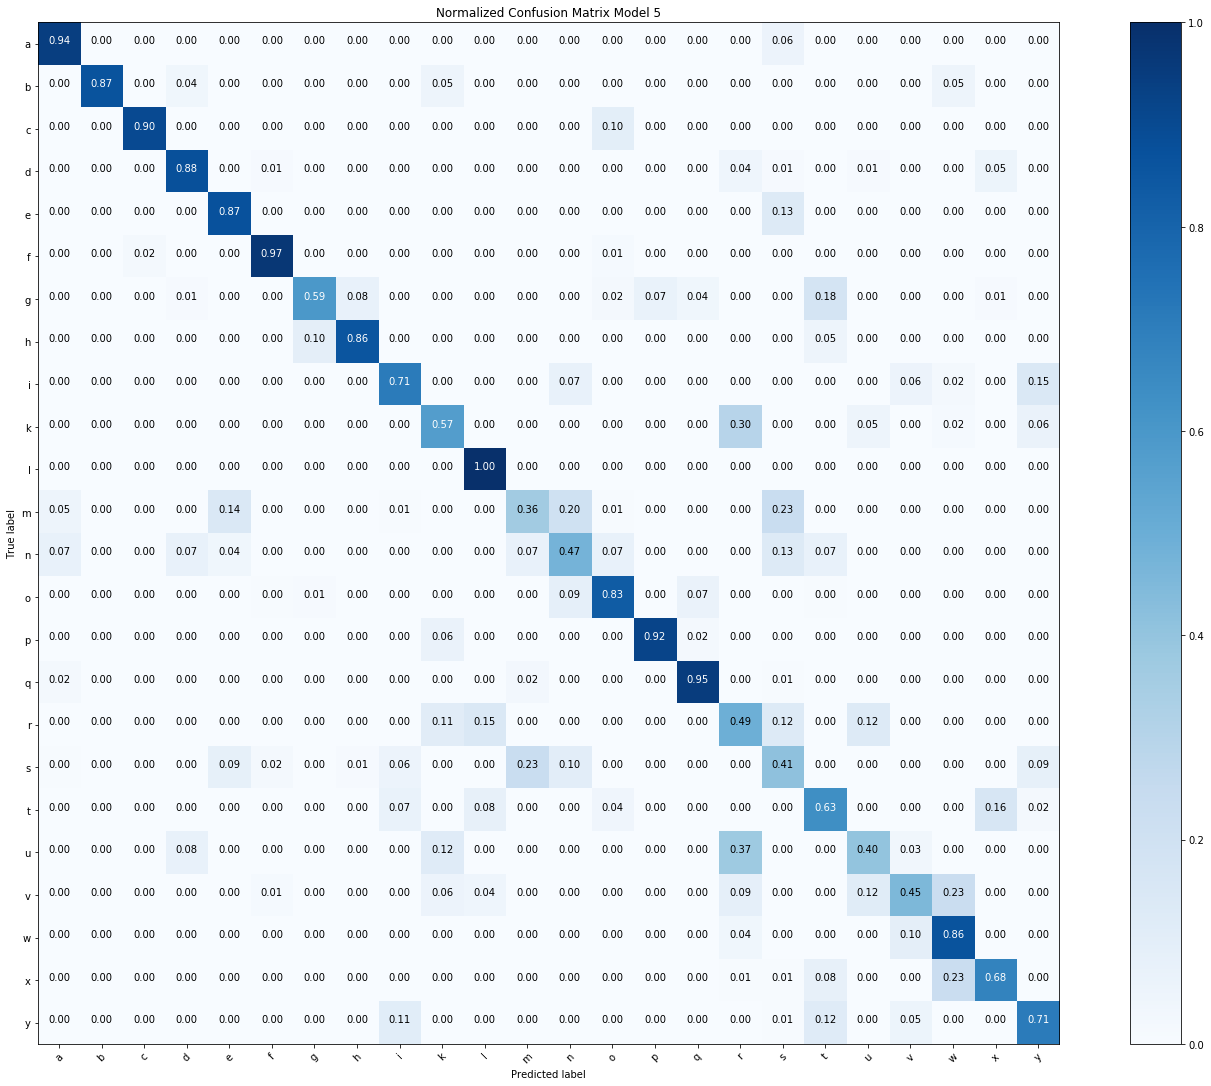

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classes=['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
conf_matrix = confusion_matrix(y_t,model5.predict_classes(xtest))
np.set_printoptions(precision=2)
plt.figure(figsize=(20,15))
plot_confusion_matrix(conf_matrix,classes,normalize=True,title='Normalized Confusion Matrix Model 5')
plt.show()


existe gran confusion entre los pares de imágenes r-u, k-r, v-w, x-w, m-s, m-n.
Al observar las imágenes se entiende la razón de la confusión. La máquina esta confundiendo r,u,k debido a que las 3 levantan un dedo, v con w porque levantan dedos en forma de 'v' y m,s,n porque empuñan la mano. Claramente disminuir la complejidad del modelo no tuvo los resultados esperados, por lo cual también se analizara la matriz del modelo 2.

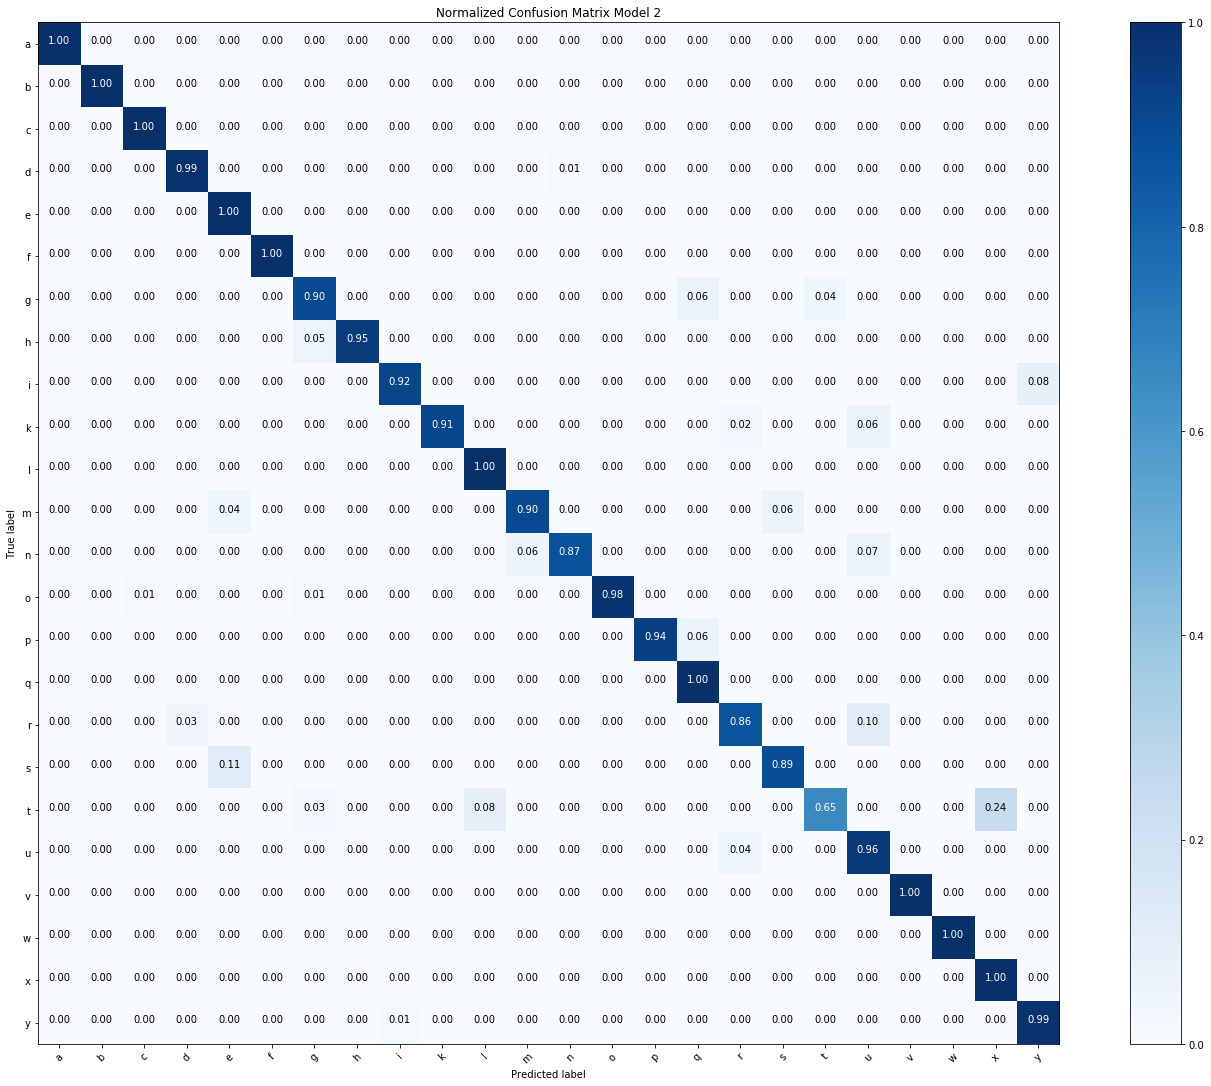

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classes=['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
conf_matrix = confusion_matrix(y_t,model2.predict_classes(xtest))
np.set_printoptions(precision=2)
plt.figure(figsize=(20,15))
plot_confusion_matrix(conf_matrix,classes,normalize=True,title='Normalized Confusion Matrix Model 2')
plt.show()


En este caso solo el par x-t tiene un error por sobre el 20%, incluso mayor que en el modelo anterior. Ambas imágenes apuntan hacia la derecha con un dedo.

En general se ve que el modelo 2 es superior al modelo 5. Sería interesante verificar si esto se sigue cumpliendo para otro dataset donde quiza las imágenes se muestren desde otro ángulo o distinta iluminación.

## E)

A continuación se entrenará una SVM con los datos sin preprocesar. Buscando valores para los parámetros $C$ y $\gamma$ que maximicen el *accuracy* de validación.

In [ ]:
def optimal_C_gamma(xtrain, xval, ytrain, yval):
    Cparams=[0.01,0.1,1,10]
    gparams=[0.001,0.01,0.1,1]
    maximum = 0
    im = 0
    jm = 0
    i=0
    for Cpar in Cparams:
        j=0
        for gpar in gparams:
            mean_kagg_val=0

            model = SVR(C=Cpar, gamma=gpar, kernel='rbf')
            model.fit(xtrain,ytrain)
            Y_pred_val = model.predict(xval)
            acc_val = accuracy_score(y_val, y_pred_val) 
            
            if i==0 and j==0: 
                maximum = acc_val
            elif acc_val > maximum: 
                maximum = acc_val
                im = i
                jm = j
            print("Con C = {:4} y gamma = {:4}, acc val = {:5}".format(Cpar, gpar, acc_val))
            j+=1
        i+=1
        
    print("{:18} = {:<15.3}".format("MIN MSE VAL", maximum))
    opt_C = Cparams[im]
    print("{:18} = {:<15}".format("OPTIMAL C", opt_C))
    opt_g = gparams[jm]
    print("{:18} = {:<15}".format("OPTIMAL gamma", opt_g))
    return C, g

In [ ]:
C0, g0 = optimal_C_gamma(x_tr, x_v, y_tr, y_v)

In [ ]:
model = SVR(C=C0, gamma=g0, kernel='rbf')
model.fit(x_tr,y_tr)
Y_pred_test = model.predict(x_t)
acc_test = accuracy_score(y_t, Y_pred_test)
print("Con C = {:4} y gamma = {:4}, acc test = {:5}".format(C0, g0, acc_test))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(y_t,Y_pred_test,'.',color=(0.2,0.2,1))

plt.show()

A continuación se entrenará una SVM con los datos escalados con la intensidad del pixel. Buscando valores para los parámetros $C$ y $\gamma$ que maximicen el *accuracy* de validación.

In [ ]:
C1, g1 = optimal_C_gamma(x_tr1, x_v1, y_tr, y_v)

In [ ]:
model = SVR(C=C1, gamma=g1, kernel='rbf')
model.fit(x_tr1,y_tr)
Y_pred_test1 = model.predict(x_t1)
acc_test1 = accuracy_score(y_t, Y_pred_test1)
print("Con C = {:4} y gamma = {:4}, acc test = {:5}".format(C1, g1, acc_test1))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(ytest,Y_pred_test1,'.',color=(0.2,0.2,1))

plt.show()

A continuación se entrenará una SVM con los datos estandarizados (centrados a la media y escalados a la desviación estándar). Buscando valores para los parámetros $C$ y $\gamma$ que maximicen el *accuracy* de validación.

In [ ]:
C2, g2 = optimal_C_gamma(x_tr2, x_v2, y_tr, y_v)

In [ ]:
model = SVR(C=C2, gamma=g2, kernel='rbf')
model.fit(x_tr2,y_tr)
Y_pred_test1 = model.predict(x_t2)
acc_test2 = accuracy_score(y_t, Y_pred_test2)
print("Con C = {:4} y gamma = {:4}, acc test = {:5}".format(C2, g2, acc_test2))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(y_t,Y_pred_test2,'.',color=(0.2,0.2,1))

plt.show()

## F)

A continuación se entrenará un árbol con los datos sin preprocesar. Buscando valores para la profundiad del mismo que maximicen el *accuracy* de validación.

In [13]:
def opt_tree_depth(xtrain, ytrain, xval, yval, m_depth=15):
    acc_val_list = []
    acc_train_list = []
    
    for depth in range(2,m_depth+1):
        model = Tree(random_state=0, max_depth = depth)
        model.fit(xtrain, ytrain)
        Y_pred_train = model.predict(xtrain)
        Y_pred_val = model.predict(xval)
        acc_train = accuracy_score(Y_pred_train, ytrain)
        acc_val = accuracy_score(Y_pred_val, yval)
        acc_train_list.append(acc_train)
        acc_val_list.append(acc_val)
    
    plt.figure(figsize=(15, 8))
    plt.plot(range(2, m_depth+1), acc_train_list, label = "Entrenamiento")
    plt.plot(range(2, m_depth+1), acc_val_list, label = "Validación")
    plt.ylabel("accuracy", fontsize=16)
    plt.xlabel("Profundidad del arbol", fontsize=16)
    plt.grid(True)
    plt.xticks(range(2,m_depth+1,2))
    plt.yticks(np.arange(0,1.05,0.05))
    plt.title('Accuracy de entrenamiento y validación', fontsize=18)
    plt.legend(fontsize=16, title='Accuracy')
    plt.show()
    
    max_acc_val = max(acc_val_list)
    print("{:18} = {:<15.3}".format("MAX ACC VAL", max_acc_val))
    opt_depth = acc_val_list.index(max_acc_val) + 2
    print("{:18} = {:<15}".format("OPTIMAL TREE DEPTH", opt_depth))
    
    return opt_depth

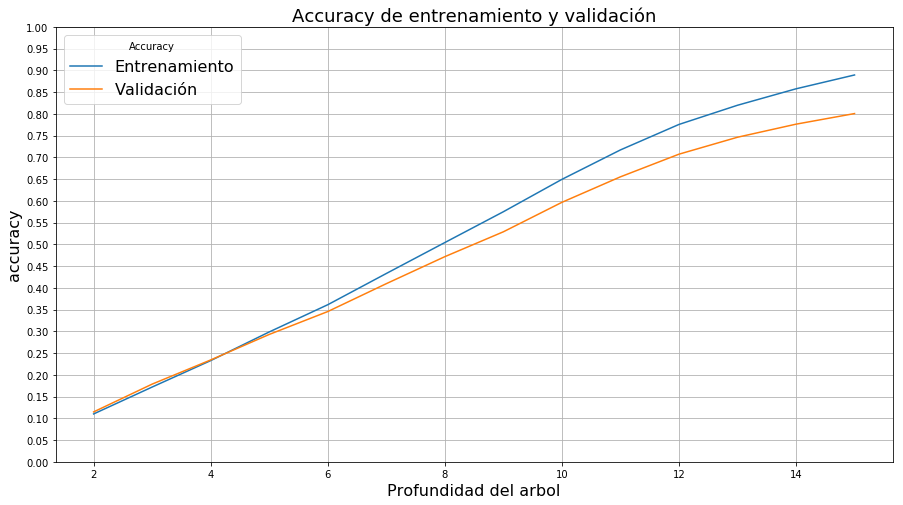

MAX ACC VAL        = 0.801          
OPTIMAL TREE DEPTH = 15             


In [14]:
depth0 = opt_tree_depth(x_tr, y_tr, x_v, y_v)

Con profundidad =   15 , acc test = 0.41424986056887897


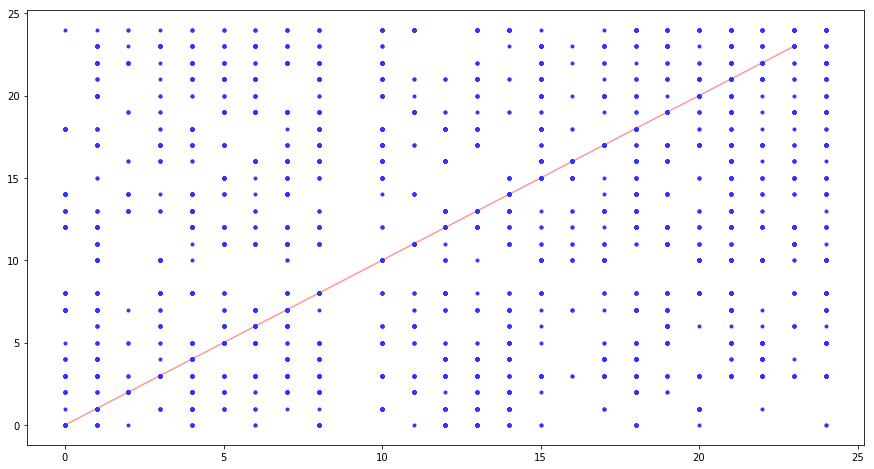

In [20]:
model = Tree(random_state=0, max_depth = depth0)
model.fit(x_tr,y_tr)
Y_pred_test = model.predict(x_t)
acc_test = accuracy_score(y_t, Y_pred_test)
print("Con profundidad = {:4} , acc test = {:5}".format(depth0, acc_test))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(y_t,Y_pred_test,'.',color=(0.2,0.2,1))

plt.show()

A continuación se entrenará un árbol con los datos escalados con la intensidad del pixel. Buscando valores para la profundiad del mismo que maximicen el *accuracy* de validación.

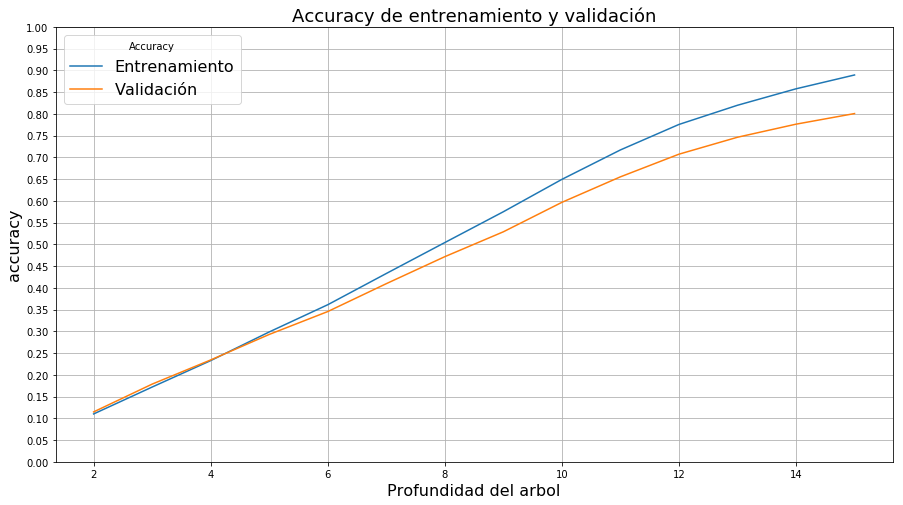

MAX ACC VAL        = 0.801          
OPTIMAL TREE DEPTH = 15             


In [21]:
depth1 = opt_tree_depth(x_tr1, y_tr, x_v1, y_v)

Con profundidad =   15 , acc test = 0.41424986056887897


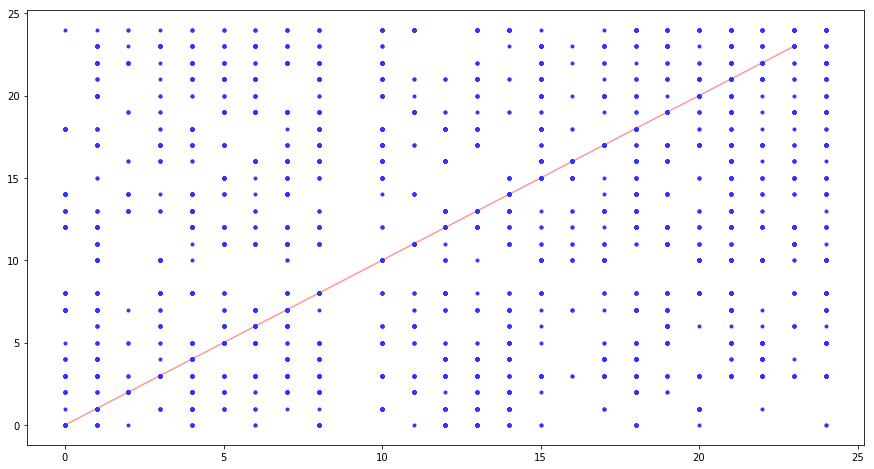

In [22]:
model = Tree(random_state=0, max_depth = depth0)
model.fit(x_tr1,y_tr)
Y_pred_test1 = model.predict(x_t1)
acc_test1 = accuracy_score(y_t, Y_pred_test1)
print("Con profundidad = {:4} , acc test = {:5}".format(depth1, acc_test1))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(y_t,Y_pred_test1,'.',color=(0.2,0.2,1))

plt.show()

A continuación se entrenará un árbol con los datos estandarizados (centrados a la media y escalados a la desviación estándar). Buscando valores para la profundiad del mismo que maximicen el *accuracy* de validación.

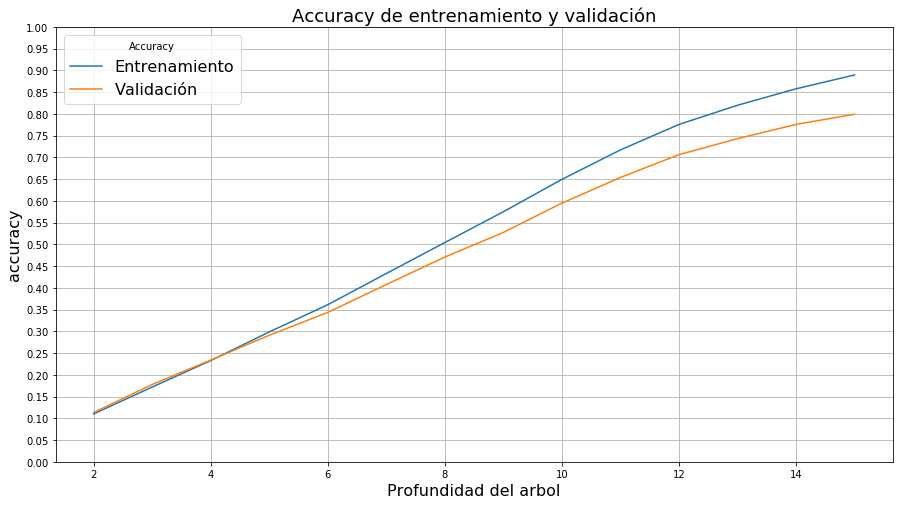

MAX ACC VAL        = 0.799          
OPTIMAL TREE DEPTH = 15             


In [23]:
depth2 = opt_tree_depth(x_tr2, y_tr, x_v2, y_v)

Con profundidad =   15 , acc test = 0.412297824874512


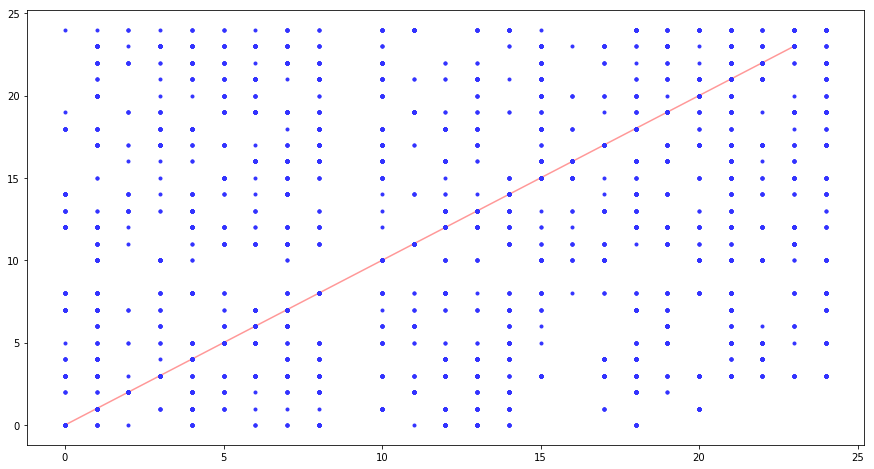

In [24]:
model = Tree(random_state=0, max_depth = depth2)
model.fit(x_tr2,y_tr)
Y_pred_test2 = model.predict(x_t2)
acc_test2 = accuracy_score(y_t, Y_pred_test2)
print("Con profundidad = {:4} , acc test = {:5}".format(depth2, acc_test2))
plt.figure(figsize=(15, 8))
indentity = np.arange(0,24)
plt.plot(indentity,indentity,'-',color=(1,0.2,0.2),alpha=0.5)
plt.plot(y_t,Y_pred_test2,'.',color=(0.2,0.2,1))

plt.show()